A1

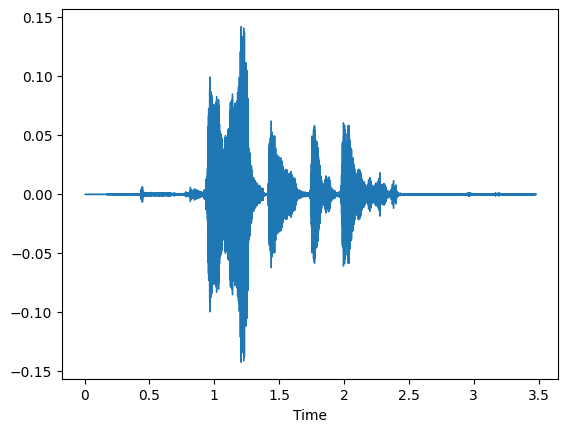

In [30]:
import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load("AI in Speech Processing.mp3")
librosa.display.waveshow(y);

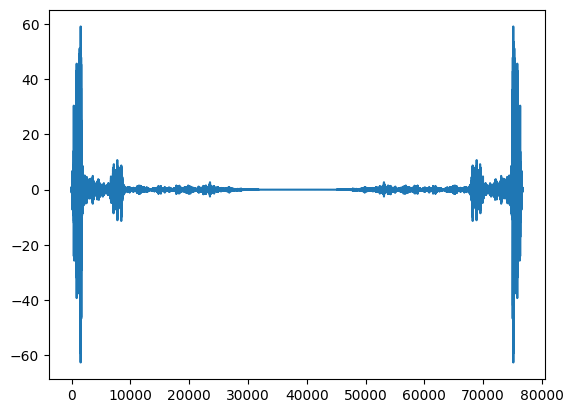

In [31]:
import numpy as np
import matplotlib.pyplot as plt
FFT_Signal = np.fft.fft(y)
plt.plot(FFT_Signal.real); #Plotting the amplitude of the signal

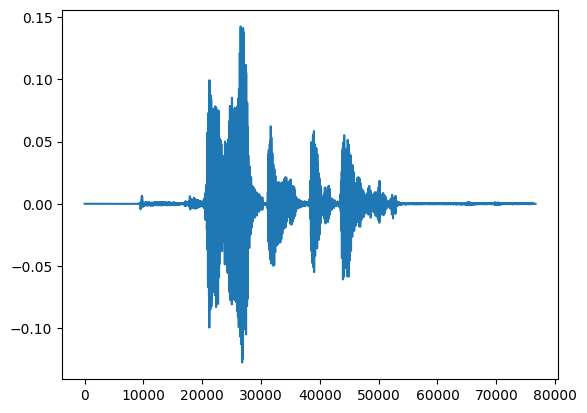

In [32]:
IFFT_Signal = np.fft.ifft(FFT_Signal);
plt.plot(IFFT_Signal);

A2

76676 38339 38339


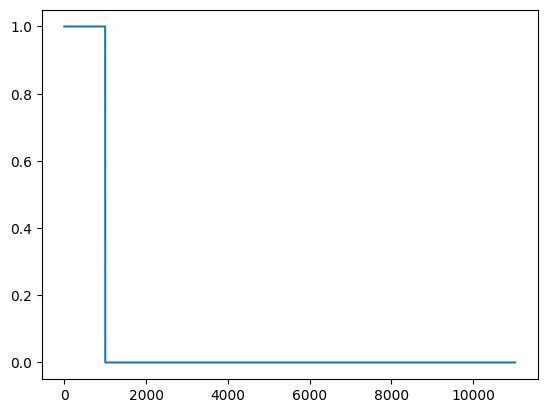

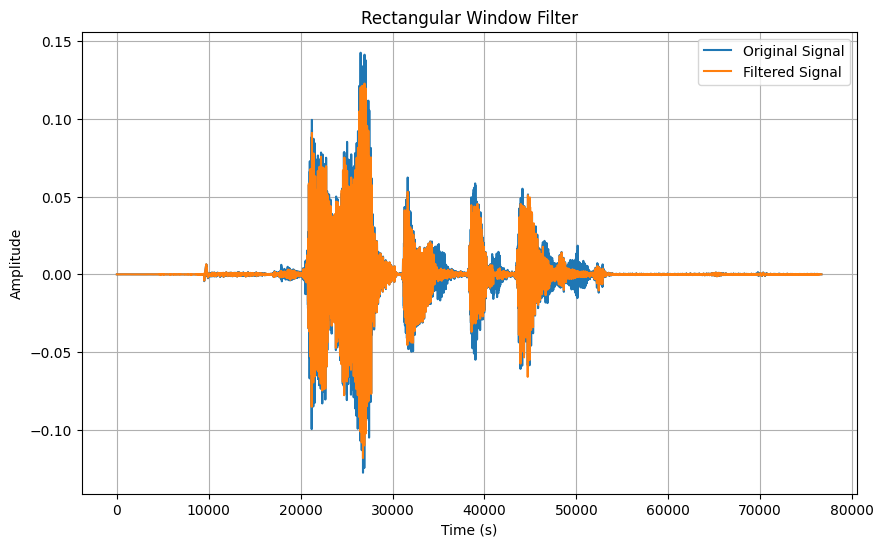

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, cutoff_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  # Compute frequency values using dft
    mask = np.abs(freqs) <= cutoff_freq  # Create a mask for frequencies below the cutoff
    plt.plot(freqs,mask) #Plotting the rectangular low pass filter
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n)  # Apply the mask in frequency domain
    return filtered_signal

# Apply rectangular window filter
cutoff_freq = 1000  # Cutoff frequency of the filter (Hz)
filtered_signal = rectangular_window_filter(y, cutoff_freq, sr)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()


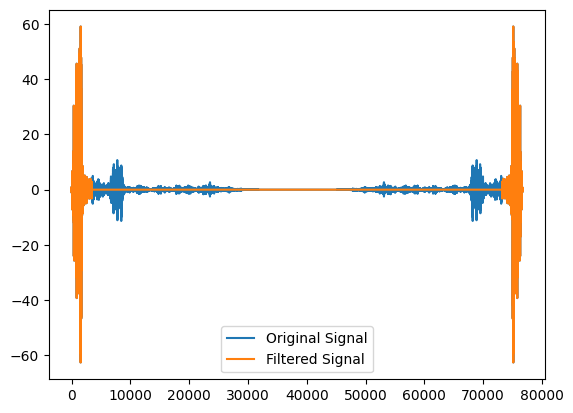

In [53]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal');
plt.legend();

Original Audio

In [47]:
ipd.Audio(y,rate=sr)

Low Pass Rectangular Window Filtered Audio

In [46]:
ipd.Audio(filtered_signal,rate=sr)

Same For Bandpass filter

(38339,)
[False False False ... False False False]


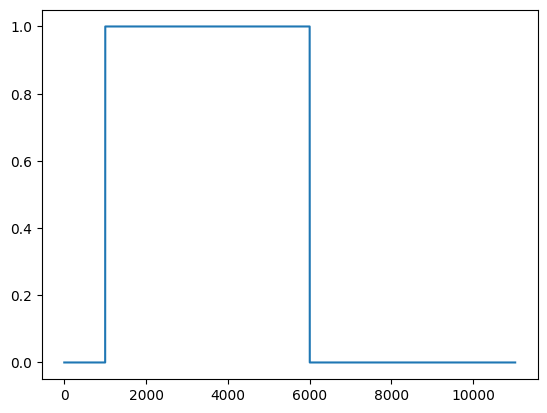

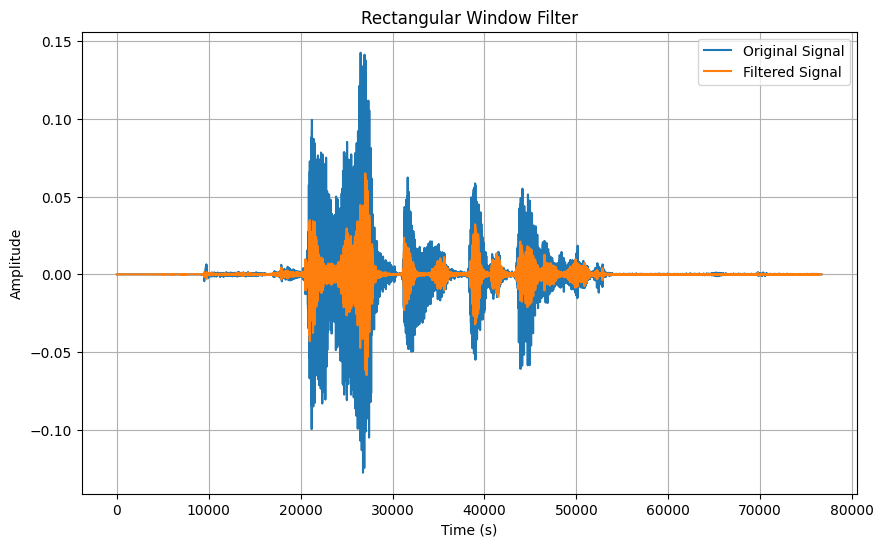

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, lower_freq, higher_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  # Compute frequency values using dft
    mask = (np.abs(freqs) >= lower_freq) & (np.abs(freqs) <= higher_freq)  # Create a mask for frequencies between lower and higher frequency cutoffs
    plt.plot(freqs,mask) #Plotting rectangular band pass filter
    print(mask.shape)
    print(mask)
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n)  # Apply the mask in frequency domain
    return filtered_signal

# Apply rectangular window filter
lower_freq = 1000  # Cutoff frequency of the filter (Hz)
higher_freq = 6000
filtered_signal = rectangular_window_filter(y, lower_freq, higher_freq, sr)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()


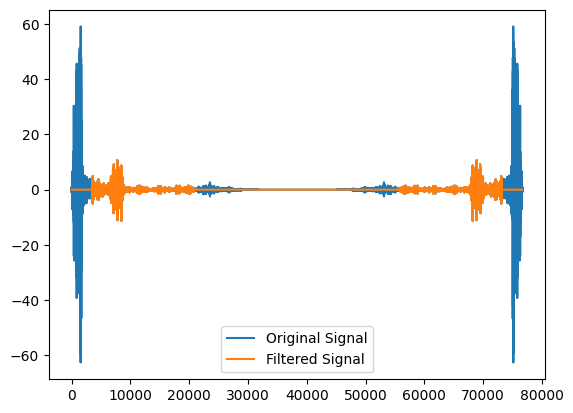

In [64]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal');
plt.legend();

In [65]:
ipd.Audio(y,rate=sr)

In [66]:
ipd.Audio(filtered_signal,rate=sr)

Highpass filter

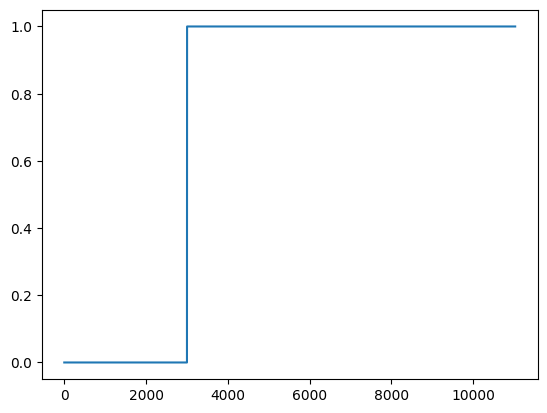

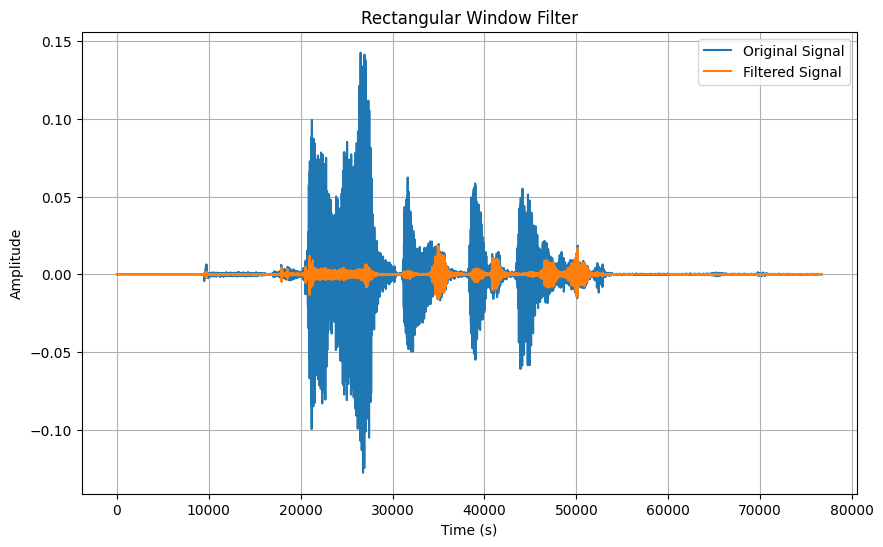

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, cutoff_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  # Compute frequency values using dft
    mask = np.abs(freqs) >= cutoff_freq  # Create a mask for frequencies above the cutoff
    plt.plot(freqs,mask) #Plotting rectangular high pass filter 
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n)  # Apply the mask in frequency domain
    return filtered_signal

# Apply rectangular window filter
cutoff_freq = 3000  # Cutoff frequency of the filter (Hz)
filtered_signal = rectangular_window_filter(y, cutoff_freq, sr)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

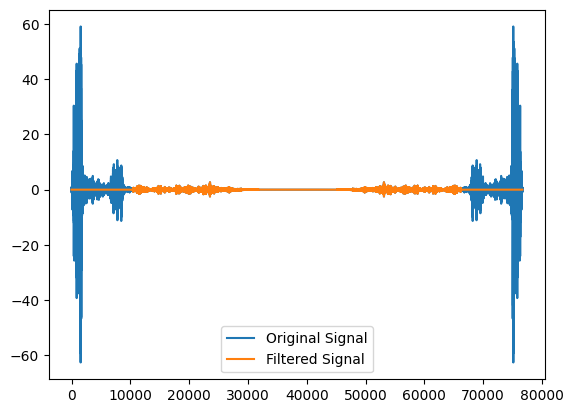

In [69]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal');
plt.legend();

In [70]:
ipd.Audio(y,rate=sr)

In [71]:
ipd.Audio(filtered_signal,rate=sr)

A3

Cosine filters

C:\Users\esury\AppData\Local\Temp\ipykernel_19152\3171471178.py:8: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  cosine_filter = cosine(window_size, np.pi * cutoff_freq)


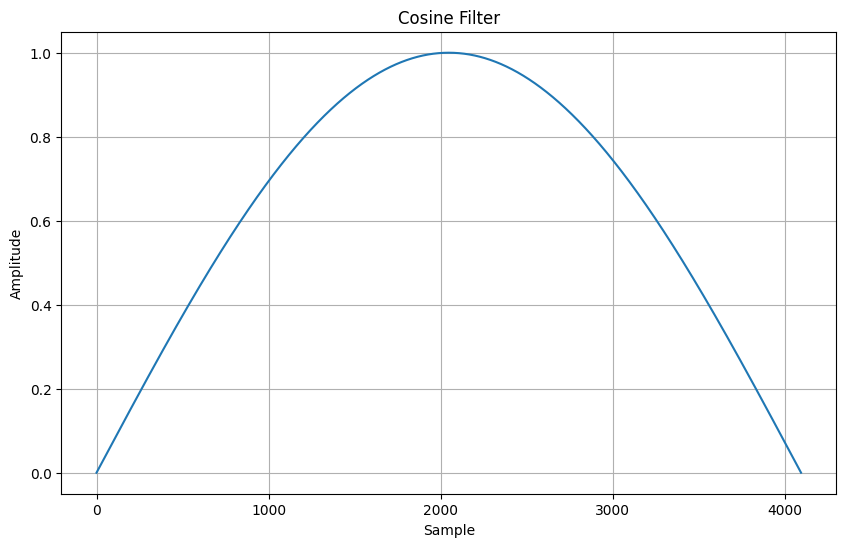

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cosine

# Generate a cosine filter
cutoff_freq = 1000  # Cutoff frequency of the filter (Hz)
window_size = 4096  # Window size for the filter
cosine_filter = cosine(window_size, np.pi * cutoff_freq)

# Plot the cosine filter
plt.figure(figsize=(10, 6))
plt.plot(cosine_filter)
plt.title('Cosine Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


C:\Users\esury\AppData\Local\Temp\ipykernel_19152\1627665849.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_filter = gaussian(window_size, std=std_dev)


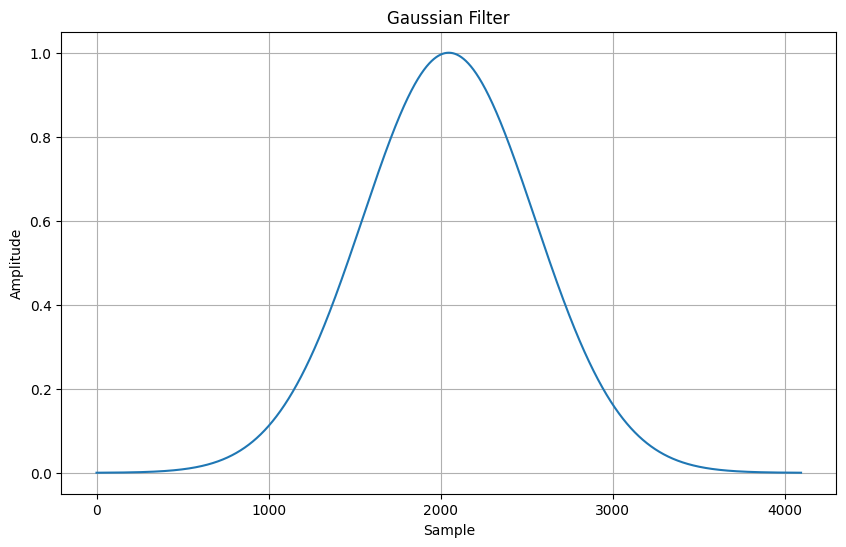

In [96]:
from scipy.signal import gaussian

# Generate a Gaussian filter
std_dev = 500  # Standard deviation of the Gaussian kernel
gaussian_filter = gaussian(window_size, std=std_dev)

# Plot the Gaussian filter
plt.figure(figsize=(10, 6))
plt.plot(gaussian_filter)
plt.title('Gaussian Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


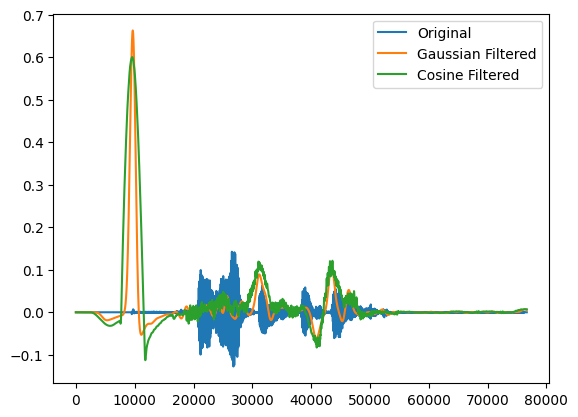

In [100]:
import librosa
from scipy.signal import convolve

y_filtered_cosine = convolve(y, cosine_filter, mode='same')
y_filtered_gaussian = convolve(y, gaussian_filter, mode='same')
plt.plot(y,label="Original")
plt.plot(y_filtered_gaussian, label='Gaussian Filtered')
plt.plot(y_filtered_cosine, label='Cosine Filtered')
plt.legend()

In [89]:
ipd.Audio(y,rate=sr)

In [101]:
ipd.Audio(y_filtered_cosine,rate=sr)

In [98]:
ipd.Audio(y_filtered_gaussian,rate=sr)